# H2M Tutorial
Author: Kexin Dong  
Published: Jan 4, 2024    
Update: May 2, 2024  

H2M is a python package for the precision modeling of human vairants in mice and vice versa.  

H2M's main functions are:  

1. Reading and formatting mutation data from different pulic sources.  

2. Querying orthologous genes between mouse and human.  

3. Generating murine equivalents for human genetic variant input or vice versa.   

See more in the [the GitHub repository](https://github.com/kexindon/h2m-public.git).   

# Quick Start  

## Installation  

### 1. Pip intsallation  

In [ ]:
pip install bioh2m  

### 2. Download the **.whl** file from [the GitHub repository](https://github.com/kexindon/h2m-public.git) and:  

In [ ]:
pip install ...bioh2m-1.0.0-py3-none-any.whl

ATTENTION: H2M has `pysam` as a dependency. This is for a function that can read .vcf files. If you are experiencing installation problems due to pysam, you can download and install the wheel file named as mini-h2m in [the GitHub repository](https://github.com/kexindon/h2m-public.git) without this function and the pysam dependency, which has been tested to solve most installation issues. The function rounded off in mini-h2m is also given in the repo. 

### H2M has been tested in Python 3.9-3.12.  

## Importing packages

In [10]:
import bioh2m as h2m
import pandas as pd

## Loading data  
We should upload reference genome and GENCODE annotation data for both human and mouse, which could be directly downloaded from a public [dropbox](https://www.dropbox.com/scl/fo/1wtrnc9w6s9gemweuw2fv/h?rlkey=hli1z6tv096cjwit5oi6bwggg&dl=0).  
Both GRCh37 and GRCh38 human reference genome assemblys are available. Upload the one that you are going to use.  

In [11]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)

In [ ]:
path_h_ref, path_m_ref = '.../GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '.../GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours; for human, GRCh38 reference genome assembly is also provided  
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)

path_h_anno, path_m_anno = '.../gencode_v19_GRCh37.db', '.../gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)

It may take up to 3 minutes to load the ref genomes.

A notebook file about how to generate the db file: [1_prepare_gencode_annotation_file.ipynb]('1_prepare_gencode_annotation_file.ipynb')

## Batch Processing

### Input format  

Common mutation data formats include MAF (Mutation Annotation Format, used by cBioPortal), VCF (Variant Call Format, used by genomAD), and ClinVar (a modified VCF format, used by ClinVar). Mutation coordinates, reference and alternative sequences are recorded in slightly different ways between the three. 

![png](readme_files/format.png)

In batch processing, H2M accepts MAF (Mutation Annotation Format) input. More information about MAF format can be found at [GDC Documentation](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/#:~:text=Mutation). For MAF files, you need to build a pandas dataframe with columns as the following example: 

![png](readme_files/1.png)  

For VCF and ClinVar files, you will need to convert the mutation coordinates and sequence information to MAF format after this. This can be achieved simply by using H2M built-in functions. Data used in this tutorial can be downloaded from [dropbox](https://www.dropbox.com/scl/fo/1wtrnc9w6s9gemweuw2fv/h?rlkey=hli1z6tv096cjwit5oi6bwggg&dl=0).  

#### Read from cBioPortal - MAF  
This format is compatible with all of the datasets in the cBioPortal, as well as TCGA and AACR-GENIE. Download the txt mutation data file from such public dataset and then load it as follows:  

In [12]:
path_aacr = '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/AACR-GENIE/v15.0/data_mutations_extended.txt'
df = h2m.cbio_reader(path_aacr)
df

,index,gene_name_h,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,start_h,end_h,Strand,Consequence,...,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag,format
0,0,KRAS,3845.0,JHU,GRCh37,12,25398285,25398285,+,missense_variant,...,probably_damaging,0.991,deleterious,0.04,NaN,NaN,1623.0,SUCCESS,False,MAF
1,1,BRAF,673.0,JHU,GRCh37,7,140453136,140453136,+,missense_variant,...,probably_damaging,0.963,deleterious,0.00,NaN,NaN,1031.0,SUCCESS,False,MAF
2,2,EGFR,1956.0,JHU,GRCh37,7,55249071,55249071,+,missense_variant,...,probably_damaging,1.000,deleterious,0.00,NaN,NaN,692.0,SUCCESS,False,MAF
3,3,TP53,7157.0,JHU,GRCh37,17,7577120,7577120,+,missense_variant,...,possibly_damaging,0.643,tolerated,0.13,NaN,NaN,930.0,SUCCESS,False,MAF
4,4,NRAS,4893.0,JHU,GRCh37,1,115256529,115256529,+,missense_variant,...,benign,0.251,tolerated,0.06,NaN,NaN,2277.0,SUCCESS,False,MAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806756,1806756,PHF6,84295.0,PROV,GRCh37,X,133551330,133551330,+,"splice_region_variant,synonymous_variant",...,NaN,NaN,NaN,NaN,NaN,NaN,311.0,SUCCESS,False,MAF
1806757,1806757,PHF6,84295.0,PROV,GRCh37,X,133559236,133559236,+,missense_variant,...,probably_damaging,0.988,deleterious,0.00,NaN,NaN,381.0,SUCCESS,False,MAF
1806758,1806758,PHF6,84295.0,PROV,GRCh37,X,133559255,133559256,+,frameshift_variant,...,NaN,NaN,NaN,NaN,NaN,NaN,509.0,SUCCESS,False,MAF
1806759,1806759,PHF6,84295.0,PROV,GRCh37,X,133559302,133559302,+,missense_variant,...,benign,0.066,deleterious_low_confidence,0.01,NaN,NaN,788.0,SUCCESS,False,MAF


Set `keep = False` to keep H2M-required columns only.  

In [13]:
df = h2m.cbio_reader(path_aacr,keep=False)
df

,index,gene_name_h,tx_id_h,start_h,end_h,type_h,ref_seq_h,alt_seq_h,format
0,0,KRAS,ENST00000256078.4,25398285,25398285,SNP,C,A,MAF
1,1,BRAF,ENST00000288602.6,140453136,140453136,SNP,A,T,MAF
2,2,EGFR,ENST00000275493.2,55249071,55249071,SNP,C,T,MAF
3,3,TP53,ENST00000269305.4,7577120,7577120,SNP,C,T,MAF
4,4,NRAS,ENST00000369535.4,115256529,115256529,SNP,T,C,MAF
...,...,...,...,...,...,...,...,...,...
851083,851083,PHF6,ENST00000332070.3,133551330,133551330,SNP,C,T,MAF
851084,851084,PHF6,ENST00000332070.3,133559236,133559236,SNP,A,G,MAF
851085,851085,PHF6,ENST00000332070.3,133559255,133559256,INS,-,T,MAF
851086,851086,PHF6,ENST00000332070.3,133559302,133559302,SNP,G,T,MAF


#### Read from GenomAD  - VCF 
Search a specific gene in genomAD browser, and download the conlusion csv.  

In [14]:
# downloaded TP53 variants from genomAD
df = h2m.vcf_reader('/Users/kexindong/Documents/GitHub/Database/PublicDatabase/genomAD/gnomAD_v4.1.0_ENSG00000141510_2024_04_29_12_41_42.csv',keep=False)
df['gene_name_h'] = 'TP53'
df

,start_h,ref_seq_h,alt_seq_h,ID,index,format,gene_name_h
0,7661882,C,T,17-7661882-C-T,0,VCF,TP53
1,7661888,T,A,17-7661888-T-A,1,VCF,TP53
2,7661899,A,G,17-7661899-A-G,2,VCF,TP53
3,7661904,C,T,17-7661904-C-T,3,VCF,TP53
4,7661905,G,A,17-7661905-G-A,4,VCF,TP53
...,...,...,...,...,...,...,...
2036,7676665,C,T,17-7676665-C-T,2036,VCF,TP53
2037,7676667,C,A,17-7676667-C-A,2037,VCF,TP53
2038,7676667,C,T,17-7676667-C-T,2038,VCF,TP53
2039,7676668,T,G,17-7676668-T-G,2039,VCF,TP53


In [15]:
df = h2m.vcf_to_maf(df)
df

,ID,start_h,end_h,ref_seq_h,alt_seq_h,type_h,index,format,gene_name_h
0,17-7661882-C-T,7661882,7661882,C,T,SNP,0,MAF,TP53
1,17-7661888-T-A,7661888,7661888,T,A,SNP,1,MAF,TP53
2,17-7661899-A-G,7661899,7661899,A,G,SNP,2,MAF,TP53
3,17-7661904-C-T,7661904,7661904,C,T,SNP,3,MAF,TP53
4,17-7661905-G-A,7661905,7661905,G,A,SNP,4,MAF,TP53
...,...,...,...,...,...,...,...,...,...
2036,17-7676665-C-T,7676665,7676665,C,T,SNP,2036,MAF,TP53
2037,17-7676667-C-A,7676667,7676667,C,A,SNP,2037,MAF,TP53
2038,17-7676667-C-T,7676667,7676667,C,T,SNP,2038,MAF,TP53
2039,17-7676668-T-G,7676668,7676668,T,G,SNP,2039,MAF,TP53


#### Read from ClinVar
download a ClinVar vcf.gz file, and choose your desired Variation IDs that you wish to model. This can be accessed at: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/   

In [16]:
filepath = '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/ClinVar/GRCh37_clinvar_20240206.vcf.gz'
variation_ids = [32798013, 375926, 325626, 140953, 233866, 1796995, 17578, 573320]
df = h2m.clinvar_reader(filepath, variation_ids)
df = h2m.clinvar_to_maf(df)
df = df[['gene_name_h',	'start_h','end_h','ref_seq_h','alt_seq_h','type_h','format','ID']]
df = df.rename(columns={'ID':'index'})

[E::idx_find_and_load] Could not retrieve index file for '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/ClinVar/GRCh37_clinvar_20240206.vcf.gz'
[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Conti

In [9]:
df

,gene_name_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,format,index
0,CTNNB1,41266098,41266098,A,G,SNP,MAF,17578
1,KIT,55599320,55599321,GA,AT,DNP,MAF,375926
2,APC,112174150,112174150,A,G,SNP,MAF,233866
3,APC,112174154,112174155,-,A,INS,MAF,1796995
4,MRE11,94200987,94200987,G,A,SNP,MAF,140953
5,TP53,7572148,7572148,G,-,DEL,MAF,325626
6,BRCA1,41244325,41244325,T,C,SNP,MAF,573320


### Get canonical transcript ID 

There will be returning two dataframes for success and failures.

In [4]:
df, df_fail = h2m.get_tx_batch(df, species='h', ver = 37)

No error occurs.


In [11]:
df

,gene_name_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,format,index,tx_id_h,ref_genome_h
0,CTNNB1,41266098,41266098,A,G,SNP,MAF,17578,ENST00000349496.5,GRCh37
1,KIT,55599320,55599321,GA,AT,DNP,MAF,375926,ENST00000288135.5,GRCh37
2,APC,112174150,112174150,A,G,SNP,MAF,233866,ENST00000457016.1,GRCh37
3,APC,112174154,112174155,-,A,INS,MAF,1796995,ENST00000457016.1,GRCh37
4,MRE11,94200987,94200987,G,A,SNP,MAF,140953,None,GRCh37
5,TP53,7572148,7572148,G,-,DEL,MAF,325626,ENST00000269305.4,GRCh37
6,BRCA1,41244325,41244325,T,C,SNP,MAF,573320,ENST00000471181.2,GRCh37


### Query the gene orthologs in mouse  

In [5]:
df_queried, df_fail = h2m.query_batch(df, direction='h2m')

No error occurs.


In [13]:
df_queried

,gene_name_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,format,index,tx_id_h,ref_genome_h,gene_name_m
0,APC,112174150,112174150,A,G,SNP,MAF,233866,ENST00000457016.1,GRCh37,Apc
1,APC,112174154,112174155,-,A,INS,MAF,1796995,ENST00000457016.1,GRCh37,Apc
2,BRCA1,41244325,41244325,T,C,SNP,MAF,573320,ENST00000471181.2,GRCh37,Brca1
3,CTNNB1,41266098,41266098,A,G,SNP,MAF,17578,ENST00000349496.5,GRCh37,Ctnnb1
4,KIT,55599320,55599321,GA,AT,DNP,MAF,375926,ENST00000288135.5,GRCh37,Kit
5,MRE11,94200987,94200987,G,A,SNP,MAF,140953,None,GRCh37,Mre11a
6,TP53,7572148,7572148,G,-,DEL,MAF,325626,ENST00000269305.4,GRCh37,Trp53


### Get canonical transcript IDs for the murine genes  

In [14]:
df_queried, df_fail = h2m.get_tx_batch(df_queried, species='m')

No error occurs.


In [16]:
df_queried

,gene_name_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,format,index,tx_id_h,ref_genome_h,gene_name_m,tx_id_m
0,APC,112174150,112174150,A,G,SNP,MAF,233866,ENST00000457016.1,GRCh37,Apc,ENSMUST00000079362.13
1,APC,112174154,112174155,-,A,INS,MAF,1796995,ENST00000457016.1,GRCh37,Apc,ENSMUST00000079362.13
2,BRCA1,41244325,41244325,T,C,SNP,MAF,573320,ENST00000471181.2,GRCh37,Brca1,ENSMUST00000017290.11
3,CTNNB1,41266098,41266098,A,G,SNP,MAF,17578,ENST00000349496.5,GRCh37,Ctnnb1,ENSMUST00000007130.15
4,KIT,55599320,55599321,GA,AT,DNP,MAF,375926,ENST00000288135.5,GRCh37,Kit,ENSMUST00000005815.7
5,MRE11,94200987,94200987,G,A,SNP,MAF,140953,None,GRCh37,Mre11a,ENSMUST00000034405.11
6,TP53,7572148,7572148,G,-,DEL,MAF,325626,ENST00000269305.4,GRCh37,Trp53,ENSMUST00000108658.10


### Compute the muerine variant equivalents  

In [17]:
df_result, df_fail = h2m.model_batch(df_queried, records_h, index_list_h, records_m, index_list_m, db_h, db_m, 37)

No error occurs.


In [18]:
df_result

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,alt_seq_m_ori,HGVSc_m_ori,HGVSp_m_ori,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,index
0,CTNNB1,ENSG00000168036.12,ENST00000349496.5,chr3,14,+,True,41266098,41266098,A,...,G,ENSMUST00000007130.15:c.95A>G,D32G,120779669,120779669,A,G,ENSMUST00000007130.15:c.95A>G,D32G,17578
1,APC,ENSG00000134982.12,ENST00000457016.1,chr5,15,+,True,112174154,112174155,-,...,A,ENSMUST00000079362.13:c.2857_2858>A,Y954Ifs*2,34445962,34445963,-,A,ENSMUST00000079362.13:c.2857_2858>A,Y954Ifs*2,1796995
2,APC,ENSG00000134982.12,ENST00000457016.1,chr5,15,+,True,112174150,112174150,A,...,G,ENSMUST00000079362.13:c.2853A>G,K951delinsK,34445958,34445958,A,G,ENSMUST00000079362.13:c.2853A>G,K951delinsK,233866
3,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,True,7572148,7572148,G,...,-,ENSMUST00000108658.10:c.279C>,None,69482536,69482536,C,-,ENSMUST00000108658.10:c.279C>,None,325626
4,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55599320,55599321,GA,...,AT,ENSMUST00000005815.7:c.2452_2453GA>AT,D818I,75810291,75810292,GA,AT,ENSMUST00000005815.7:c.2452_2453GA>AT,D818I,375926
5,BRCA1,ENSG00000012048.15,ENST00000471181.2,chr17,23,-,True,41244325,41244325,T,...,C,ENSMUST00000017290.11:c.3130A>G,N1044D,101415003,101415003,T,C,ENSMUST00000017290.11:c.3130A>G,N1044D,573320


## Single variant input  

### Query orthologous genes
First of all, you can use H2M to query a human gene for the presence of mouse homologs and vice versa.  

In [3]:
query_result = h2m.query('TP53')

Query human gene: TP53;
Mouse ortholog(s): Trp53;
Homology type: one2one;
Sequence Simalarity(%):77.3537.


In [4]:
query_result = h2m.query('Trp53', direction='m2h')

Query human gene: Trp53;
Mouse ortholog(s): TP53;
Homology type: one2one;
Sequence Simalarity(%):77.3537.


The output is a list of information for all the mouse ortholog(s) (if have; sometimes more than one).  
Each element is a dictionary of **mouse gene name**, **mouse gene id**, **homology type** (one to one/one to multiple/many to many), and **similarity of human and mouse gene in percentage**.

In [5]:
h2m.query('U1')

Query human gene: U1;
Mouse ortholog(s): Gm22866,Gm25938;
Homology type: one2many;
Sequence Simalarity(%):68.75, 62.3457.


[{'gene_name_m': 'Gm22866',
  'gene_id_m': 'ENSMUSG00000065881',
  'homology_type': 'ortholog_one2many',
  'similarity': 68.75},
 {'gene_name_m': 'Gm25938',
  'gene_id_m': 'ENSMUSG00000077327',
  'homology_type': 'ortholog_one2many',
  'similarity': 62.3457}]

In [6]:
h2m.query('TPT1P6')

The query human gene: TPT1P6 has no mouse ortholog or this gene id is not included in the database. Please check the input format.


[None]

A print output is helpful in interactive tasks like a Jupyter Notebook. You can also turn off this.

Except for gene names, both ENSEMBL gene id and transcript id are accepted to identify a human gene. You can use the **ty** parameter ('tx_id','gene_id' or 'name') to specify your input type, but this is totally optional.

Using gene id:

In [7]:
query_result = h2m.query('ENSG00000141510')

Query human gene: TP53;
Mouse ortholog(s): Trp53;
Homology type: one2one;
Sequence Simalarity(%):77.3537.


Using transcript id. Should include a db annotation file with the same ref genome version.

In [8]:
query_result = h2m.query('ENST00000269305.4', db=db_h, ty='tx_id')

Query human gene: TP53;
Mouse ortholog(s): Trp53;
Homology type: one2one;
Sequence Simalarity(%):77.3537.


The query result of all human genes, as well as corresponding transcript IDs, is also available as [a csv file]('https://www.dropbox.com/scl/fi/o6735wok25t5dstvpz9kd/Supp_Table_1_Homo_Genes.csv?rlkey=skvxlcfv4r8ksspiq5itxxjc9&dl=0').

### Get transcript ID (Internet connection needed)

One gene may have different transcripts. For mutation modeling, it is important to specify one transcript. If you do not have this information in hand, you can use H2M to get it.

Again, both gene IDs and gene names are accepted as identificaitons for human and mouse genes.

In [9]:
list_tx_id_h = h2m.get_tx_id('TP53', 'h', ver=37)

Genome assembly: GRCh37;
The canonical transcript is: ENST00000269305.4;
You can choose from the 17 transcripts below for further analysis:
(1)ENST00000269305.4 (2)ENST00000413465.2 (3)ENST00000359597.4 (4)ENST00000504290.1 (5)ENST00000510385.1 (6)ENST00000504937.1 (7)ENST00000455263.2 (8)ENST00000420246.2 (9)ENST00000445888.2 (10)ENST00000576024.1 (11)ENST00000509690.1 (12)ENST00000514944.1 (13)ENST00000574684.1 (14)ENST00000505014.1 (15)ENST00000508793.1 (16)ENST00000604348.1 (17)ENST00000503591.1



In [10]:
list_tx_id_m = h2m.get_tx_id('ENSMUSG00000059552', 'm')

Genome assembly: GRCm39;
The canonical transcript is: ENSMUST00000108658.10;
You can choose from the 6 transcripts below for further analysis:
(1)ENSMUST00000108658.10 (2)ENSMUST00000171247.8 (3)ENSMUST00000005371.12 (4)ENSMUST00000147512.2 (5)ENSMUST00000108657.4 (6)ENSMUST00000130540.2



More information is offered except for a complete list of all transcripts.

- the chromosome

In [11]:
list_tx_id_h[0]

17

- the start and end location of the gene on the chromosome

In [12]:
list_tx_id_h[1:3]

[7565097, 7590856]

- the canonical transcript annotated by ENSEMBL database and used by major clinical datasets (e.g. AACR-GENIE)

In [13]:
list_tx_id_h[3]

'ENST00000269305.4'

- the complete list of transcripts starting with the canonical one

In [14]:
list_tx_id_h[4]

['ENST00000269305.4',
 'ENST00000413465.2',
 'ENST00000359597.4',
 'ENST00000504290.1',
 'ENST00000510385.1',
 'ENST00000504937.1',
 'ENST00000455263.2',
 'ENST00000420246.2',
 'ENST00000445888.2',
 'ENST00000576024.1',
 'ENST00000509690.1',
 'ENST00000514944.1',
 'ENST00000574684.1',
 'ENST00000505014.1',
 'ENST00000508793.1',
 'ENST00000604348.1',
 'ENST00000503591.1']

The output is a list of information for all the mouse ortholog(s) (if have; sometimes more than one).  
Each element is a dictionary of **mouse gene name**, **mouse gene id**, **homology type** (one to one/one to multiple), and **similarity of human and mouse gene in percentage**.


### Modeling human variants in the mouse genome

#### Input Parameters Guidance  

Now you can use H2M to model your human mutations of interest.  
You should have at least such information in hand:  
1. transcript id of the human gene
2. transcript id of the mouse gene    

With MAF file:   

3. start location of human variants *on the chromosome*  
4. end location of human variants *on the chromosome*  
5. the reference and alternative sequence *on the positive strand of the chromosome*  
6. mutation type in `'SNP','DNP','TNP','ONP','INS','DEL'` 
7. the version number of human ref genome

#### Usage

Taking *TP53* R273H (ENST00000269305.4:c.818G>A) as an example.

In [15]:
tx_id_h, tx_id_m = list_tx_id_h[3], list_tx_id_m[3]
# use the canonical transcript

In [17]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577120, 7577120, 'C','T', ty_h = 'SNP', ver = 37)
pd.DataFrame(model_result).T

,0
gene_name_h,TP53
gene_id_h,ENSG00000141510.11
tx_id_h,ENST00000269305.4
chr_h,chr17
exon_num_h,10
strand_h,-
match,True
start_h,7577120
end_h,7577120
ref_seq_h,C


Another non-coding example.

In [8]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7578291,7578291, 'C','T', ty_h = 'SNP', ver = 37)
pd.DataFrame(model_result)

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,ref_seq_m_ori,alt_seq_m_ori,HGVSc_m_ori,HGVSp_m_ori,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m
0,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,False,7578291,7578291,T,...,A,A,ENSMUST00000108658.10:c.551-2A>A,X183_splice,69479450,69479450,A,A,ENSMUST00000108658.10:c.551-2A>A,X183_splice


We can see that this human mutaton can be originally modeled by introducing the same neucleotide alteration.

By setting `show_sequence = True`, we can output the sequences of the wild-type and mutated human gene, wild-type, originally-modeled, and alternatively-modeled (if exsist) mouse gene. (If it can be originally modeled, the new_seq_m_alt would be the same as new_seq_m_ori)

In [73]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577120, 7577120, 'C','T', ty_h = 'SNP', ver = 37, show_sequence=True)
pd.DataFrame(model_result)

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,seq_m,new_seq_m_ori,mouse_tx_idx_ori,mouse_p_idx_ori,mouse_new_p_idx_ori,dist_m,new_seq_m,mouse_tx_idx,mouse_p_idx,mouse_new_p_idx
0,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,True,7577120,7577120,C,...,ATGACTGCCATGGAGGAGTCACAGTCGGATATCAGCCTCGAGCTCC...,ATGACTGCCATGGAGGAGTCACAGTCGGATATCAGCCTCGAGCTCC...,[808],[269],[269],None,ATGACTGCCATGGAGGAGTCACAGTCGGATATCAGCCTCGAGCTCC...,[808],[269],[269]


Modeling results with `show_sequence = True` can be directly visulaized by `h2m.visulization`.  

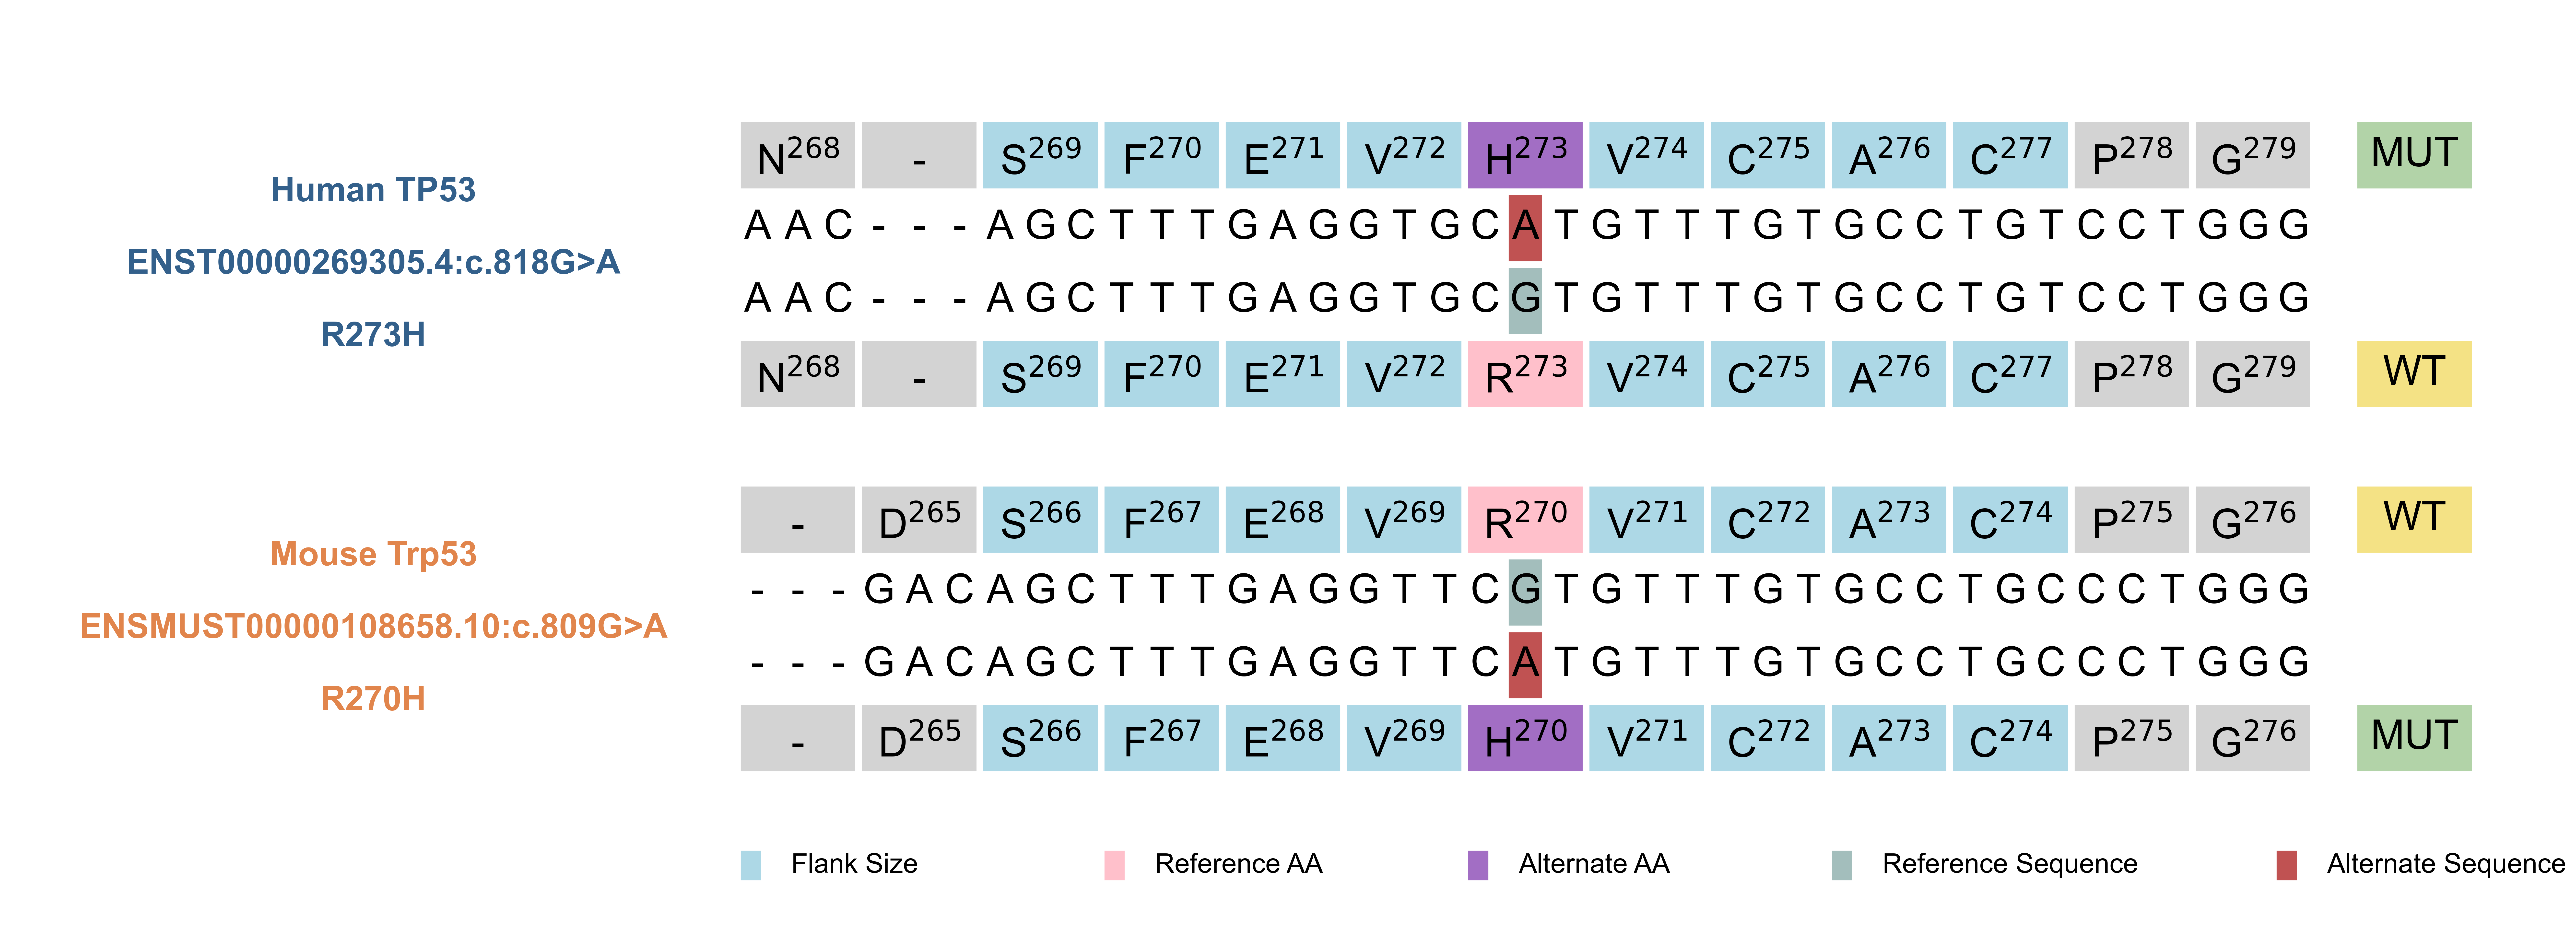

In [75]:
h2m.visualization(model_result, flank_size=4, print_size=2)

The length of the identical sequences between human and mouse on teh left/right side of the mutation is provided in order to give you a sense of the local homology and how confident you should be in the fidelity of this modeling.  

In [77]:
pd.DataFrame(model_result)[['flank_size_left','flank_size_right']]

,flank_size_left,flank_size_right
0,4aa,15aa


### Alternative modeling

Sometimes the human mutation cannot be originally modeled in the mouse genome by using the same neucleotide alteration. Under this circumsatance, some alternative modeling strategies may be found by searching the codon list of the target amino acids. 

Taking TP53 R306Q as an example. 

In [10]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577021, 7577021, 'C','T', ty_h = 'SNP', ver = 37)
pd.DataFrame(model_result)[['HGVSc_h','HGVSp_h',
                            'HGVSc_m_ori','HGVSp_m_ori',
                            'HGVSc_m','HGVSp_m']]

,HGVSc_h,HGVSp_h,HGVSc_m_ori,HGVSp_m_ori,HGVSc_m,HGVSp_m
0,ENST00000269305.4:c.917G>A,R306Q,ENSMUST00000108658.10:c.908G>A,R303K,ENSMUST00000108658.10:c.907_908AG>CA,R303Q
1,ENST00000269305.4:c.917G>A,R306Q,ENSMUST00000108658.10:c.908G>A,R303K,ENSMUST00000108658.10:c.907_909AGA>CAG,R303Q



Taking TP53 R249_T253delinsS as an example.

In [11]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577523, 7577534, 'GTGAGGATGGGC', '-', ty_h = 'DEL', ver = 37)
pd.DataFrame(model_result)[['HGVSc_h','HGVSp_h',
                            'HGVSc_m_ori','HGVSp_m_ori',
                            'HGVSc_m','HGVSp_m']]

,HGVSc_h,HGVSp_h,HGVSc_m_ori,HGVSp_m_ori,HGVSc_m,HGVSp_m
0,ENST00000269305.4:c.747_758GCCCATCCTCAC>,R249_T253delinsS,ENSMUST00000108658.10:c.738_749ACCTATCCTTAC>,P247_T250del,ENSMUST00000108658.10:c.736_748CGACCTATCCTTA>T,R246_T250delinsS
1,ENST00000269305.4:c.747_758GCCCATCCTCAC>,R249_T253delinsS,ENSMUST00000108658.10:c.738_749ACCTATCCTTAC>,P247_T250del,ENSMUST00000108658.10:c.736_749CGACCTATCCTTAC>AG,R246_T250delinsS
2,ENST00000269305.4:c.747_758GCCCATCCTCAC>,R249_T253delinsS,ENSMUST00000108658.10:c.738_749ACCTATCCTTAC>,P247_T250del,ENSMUST00000108658.10:c.736_750CGACCTATCCTTACC...,R246_T250delinsS
3,ENST00000269305.4:c.747_758GCCCATCCTCAC>,R249_T253delinsS,ENSMUST00000108658.10:c.738_749ACCTATCCTTAC>,P247_T250del,ENSMUST00000108658.10:c.736_750CGACCTATCCTTACC...,R246_T250delinsS
4,ENST00000269305.4:c.747_758GCCCATCCTCAC>,R249_T253delinsS,ENSMUST00000108658.10:c.738_749ACCTATCCTTAC>,P247_T250del,ENSMUST00000108658.10:c.736_750CGACCTATCCTTACC...,R246_T250delinsS


The default maximum number of output alternatives is 5. You can definitly change that by the parameter **max_alternative**.

In [85]:
model_result_long = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577523, 7577534, 'GTGAGGATGGGC', '-', ty_h = 'DEL', ver = 37, max_alternative=10)
len(model_result), len(model_result_long)

(5, 6)

If you do not want to alternatively model variants, you can set **search_alternatve** to False.

In [86]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577523, 7577534, 'GTGAGGATGGGC', '-', ty_h = 'DEL', ver = 37, search_alternative= False)
model_result[0]['statement']

'Class 6: This mutation cannot be originally modeled.'

### Original modeling with uncertain effects

For frame-shifting mutations and mutations in the non-coding region, we cannot find such alternative modeling strategies with the same protein change effects. H2M will only offer the original modeling and its effect.

- Example 1: *TP53* C275Lfs*31

In [14]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577115, 7577116, '','A', ty_h = 'INS', ver = 37)
pd.DataFrame(model_result)[['HGVSc_h','HGVSp_h',
                            'HGVSc_m','HGVSp_m',
                            'statement']]

,HGVSc_h,HGVSp_h,HGVSc_m,HGVSp_m,statement
0,ENST00000269305.4:c.822_823>T,C275Lfs*31,ENSMUST00000108658.10:c.813_814>T,C272Lfs*24,"Class 2: This mutation can be modeled, but the..."


- Example 2: TP53 splice site mutation

In [18]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7578555, 7578555, 'C', 'T', ty_h = 'SNP', ver = 37)
pd.DataFrame(model_result)[['HGVSc_h','HGVSp_h',
                            'HGVSc_m','HGVSp_m',
                            'statement']]

,HGVSc_h,HGVSp_h,HGVSc_m,HGVSp_m,statement
0,ENST00000269305.4:c.376-1G>A,X125_splice,ENSMUST00000108658.10:c.367-1G>A,X122_splice,"Class 2: This mutation can be modeled, but the..."


## Additional Usage Hint   

### Additional function 1: modeling M2H

Replace human variant coordinates and sequences with murine ones, and set `direction = 'm2h'`.  Use TP53 R273H as an example.  

#### H2M:  

In [19]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 7577120, 7577120, 'C','T', ty_h = 'SNP', ver = 37)
pd.DataFrame(model_result)[['start_h','end_h','ref_seq_h','alt_seq_h','HGVSp_h','start_m','end_m','ref_seq_m','alt_seq_m','HGVSp_m']]

,start_h,end_h,ref_seq_h,alt_seq_h,HGVSp_h,start_m,end_m,ref_seq_m,alt_seq_m,HGVSp_m
0,7577120,7577120,C,T,R273H,69480434,69480434,G,A,R270H


#### M2H:  

In [20]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 
                         69480434, 69480434, 'G', 'A', ty_h = 'SNP', ver = 37, 
                         direction='m2h')
pd.DataFrame(model_result)[['start_h','end_h','ref_seq_h','alt_seq_h','HGVSp_h','start_m','end_m','ref_seq_m','alt_seq_m','HGVSp_m']]

,start_h,end_h,ref_seq_h,alt_seq_h,HGVSp_h,start_m,end_m,ref_seq_m,alt_seq_m,HGVSp_m
0,7577120,7577120,C,T,R273H,69480434,69480434,G,A,R270H


### Additional function 2: modeling H2H/M2M paralogs  

Replace the reference genome and gencode annotation database input parameter to do so.  Take human IDH1 R172G as an example.  

In [102]:
df = df[df['class']==1].reset_index(drop=True)

In [32]:
tx_id_1_h, tx_id_2_h = h2m.get_tx_id('SMARCA2','h',ver=37)[3],h2m.get_tx_id('SMARCA4','h',ver=37)[3]

Genome assembly: GRCh37;
The canonical transcript is: ENST00000382203.1;
You can choose from the 17 transcripts below for further analysis:
(1)ENST00000382203.1 (2)ENST00000450198.1 (3)ENST00000457226.1 (4)ENST00000439732.1 (5)ENST00000382194.1 (6)ENST00000491574.1 (7)ENST00000452193.1 (8)ENST00000302401.3 (9)ENST00000423555.1 (10)ENST00000382186.1 (11)ENST00000417599.1 (12)ENST00000382185.1 (13)ENST00000382183.1 (14)ENST00000416751.1 (15)ENST00000349721.2 (16)ENST00000357248.2 (17)ENST00000324954.5

Genome assembly: GRCh37;
The canonical transcript is: ENST00000429416.3;
You can choose from the 20 transcripts below for further analysis:
(1)ENST00000429416.3 (2)ENST00000344626.4 (3)ENST00000541122.2 (4)ENST00000589677.1 (5)ENST00000444061.3 (6)ENST00000590574.1 (7)ENST00000591545.1 (8)ENST00000592604.1 (9)ENST00000586122.1 (10)ENST00000587988.1 (11)ENST00000591595.1 (12)ENST00000585799.1 (13)ENST00000592158.1 (14)ENST00000586892.1 (15)ENST00000538456.3 (16)ENST00000586985.1 (17)ENST000

In [26]:
pd.DataFrame(model_result)

,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,matcm,start_m,end_m,ref_seq_m,...,ref_seq_h_ori,alt_seq_h_ori,HGVSc_h_ori,HGVSp_h_ori,start_h,end_h,ref_seq_h,alt_seq_h,HGVSc_h,HGVSp_h
0,IDH1,ENSG00000138413.9,ENST00000415913.1,chr2,8,-,True,90631839,90631839,A,...,None,None,None,None,None,None,None,None,None,None


In [33]:
model_result = h2m.model(records_h,index_list_h, records_h, index_list_h, db_h, db_h, tx_id_1_h, tx_id_2_h, 
                        2115855, 2115855, 'G', 'A', ty_h = 'SNP', ver = 37,
                        direction='h2h')
pd.DataFrame(model_result)[['gene_name_h_1','start_h_1','end_h_1','ref_seq_h_1','alt_seq_h_1','HGVSp_h_1','gene_name_h_2','start_h_2','end_h_2','ref_seq_h_2','alt_seq_h_2','HGVSp_h_2']]

,gene_name_h_1,start_h_1,end_h_1,ref_seq_h_1,alt_seq_h_1,HGVSp_h_1,gene_name_h_2,start_h_2,end_h_2,ref_seq_h_2,alt_seq_h_2,HGVSp_h_2
0,SMARCA2,2115855,2115855,G,A,G1164R,SMARCA4,11143999,11143999,G,A,G1194R


### Additional function 3: modeling for base editing

When you set **param = 'BE'**, you will get modeling results that can be modeled by base editing (A->G, G->A, C->T, T->C, AA->GG, ...etc.). If one mutation can be originally modeled in the mouse genome but not in a BE style, alternative BE modeling strategies will be returned too.

Taking *KEAP1* F221L as an example.

In [34]:
h2m.query('KEAP1')

Query human gene: KEAP1;
Mouse ortholog(s): Keap1;
Homology type: one2one;
Sequence Simalarity(%):94.0705.


[{'gene_name_m': 'Keap1',
  'gene_id_m': 'ENSMUSG00000003308',
  'homology_type': 'ortholog_one2one',
  'similarity': 94.0705}]

In [35]:
tx_id_h_2, tx_id_m_2 = h2m.get_tx_id('KEAP1','h',ver=37, show=False)[3], h2m.get_tx_id('Keap1','m', show=False)[3]
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h_2, tx_id_m_2, 10602915, 10602915, 'G','T', ty_h = 'SNP', ver = 37, param='BE')

In [36]:
pd.DataFrame(model_result)[['HGVSc_h','HGVSp_h','HGVSc_m_ori','HGVSp_m_ori','statement','HGVSc_m','HGVSp_m']]

,HGVSc_h,HGVSp_h,HGVSc_m_ori,HGVSp_m_ori,statement,HGVSc_m,HGVSp_m
0,ENST00000171111.5:c.663C>A,F221L,ENSMUST00000164812.8:c.663C>A,F221L,Class 1: This mutation can be alternatively mo...,ENSMUST00000164812.8:c.661T>C,F221L


### Additional function 4: modeling by amino acid change input  

Set **coor = 'aa'** and modeling variants by amino acid change input. Use TP53 R175H as an example.

In [37]:
model_result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, tx_id_h, tx_id_m, 175, 175, 'R', 'H', coor = 'aa', ty_h = 'SNP', ver = 37)
pd.DataFrame(model_result)

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,ref_seq_m_ori,alt_seq_m_ori,HGVSc_m_ori,HGVSp_m_ori,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m
0,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,True,7578405,7578407,GCG,...,CGC,CAC,ENSMUST00000108658.10:c.514_516CGC>CAC,R172H,69479338,69479338,G,A,ENSMUST00000108658.10:c.515G>A,R172H
1,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,True,7578405,7578407,GCG,...,CGC,CAC,ENSMUST00000108658.10:c.514_516CGC>CAC,R172H,69479338,69479339,GC,AT,ENSMUST00000108658.10:c.515_516GC>AT,R172H


All of these can also be done in a batch-processing style by using `h2m.model_batch`.   

## Appendix  

In [65]:
list(model_result[0].keys())

['gene_name_h',
 'gene_id_h',
 'tx_id_h',
 'chr_h',
 'exon_num_h',
 'strand_h',
 'match',
 'start_h',
 'end_h',
 'ref_seq_h',
 'alt_seq_h',
 'HGVSc_h',
 'HGVSp_h',
 'classification_h',
 'exon_h',
 'type_h',
 'status',
 'class',
 'statement',
 'flank_size_left',
 'flank_size_right',
 'gene_name_m',
 'gene_id_m',
 'tx_id_m',
 'chr_m',
 'exon_num_m',
 'strand_m',
 'type_m',
 'classification_m',
 'exon_m',
 'start_m_ori',
 'end_m_ori',
 'ref_seq_m_ori',
 'alt_seq_m_ori',
 'HGVSc_m_ori',
 'HGVSp_m_ori',
 'start_m',
 'end_m',
 'ref_seq_m',
 'alt_seq_m',
 'HGVSc_m',
 'HGVSp_m']

In [69]:
list_of_name = ['gene_name_h',
 'gene_id_h',
 'tx_id_h',
 'chr_h',
 'exon_num_h',
 'strand_h',
 'match',
 'start_h | end_h',
 'ref_seq_h | alt_seq_h',
 'HGVSc_h | HGVSp_h',
 'classification_h',
 'exon_h',
 'type_h',
 'status',
 'class',
 'statement',
 'flank_size_left | flank_size_right',
 'gene_name_m',
 'gene_id_m',
 'tx_id_m',
 'chr_m',
 'exon_num_m',
 'strand_m',
 'type_m',
 'classification_m',
 'exon_m',
 'start_m_ori | end_m_ori',
 'ref_seq_m_ori | alt_seq_m_ori',
 'HGVSc_m_ori | HGVSp_m_ori',
 'start_m | end_m',
 'ref_seq_m | alt_seq_m',
 'HGVSc_m | HGVSp_m']

In [78]:
annotation_of_column = [
    'Human gene name',
    'Human gene ID',
    'Human transcript ID',
    'Human chromosome number',
    'Total number of exons of the human transcript',
    '+ or - strand of the human transcript on the chromosome',
    'The computed reference sequence by given coordinate is matched with the input reference sequence or not',
    'Start and end position of the human variant on the chromosome in MAF format',
    'Reference and alternate sequence of the human variant on the chromosome in MAF format',
    'HGVSc and HGVSp expression of the human variant',
    'Human variant effect classification, including missense/nonsense/in-frame indel/fram-shift indel/intron, etc.',
    'Exon/Intron location of the given human mutation, for example, E_7/I_5',
    'Human variant type in MAF format, including SNP/DNP/TNO/ONP/INS/DEL',
    'This mutation can be modeled in the given target transcript or not, True or False',
    'H2M modeling result class, 0-5',
    'Statement of the H2M result class',
    'Length of the identical sequences between human and mouse on teh left/right side of the mutation',
    'Mouse gene name',
    'Mouse gene ID',
    'Mouse transcript ID',
    'Mouse chromosome number',
    'Total number of exons of the mouse transcript',
    '+ or - strand of the mouse transcript on the chromosome',
    'Mouse variant type in MAF format, including SNP/DNP/TNO/ONP/INS/DEL',
    'Mouse variant effect classification',
    'Exon/Intron location of the murine mutation',
    'Start and end position of the mouse variant (with exactly the same DNA change) on the chromosome in MAF format',
    'Reference and alternate sequence of the mouse variant (with exactly the same DNA change) on the chromosome in MAF format',
    'HGVSc and HGVSp expression of the mouse variant (with exactly the same DNA change)',
    'Start and end position of the mouse variant (with the same amino acid change) on the chromosome in MAF format',
    'Reference and alternate sequence of the mouse variant (with the same amino acid change) on the chromosome in MAF format',
    'HGVSc and HGVSp expression of the mouse variant (with the same amino acid change)'
]

In [79]:
df = pd.DataFrame(zip(list_of_name, annotation_of_column))
df.columns = ['Column','Annotation']
df

,Column,Annotation
0,gene_name_h,Human gene name
1,gene_id_h,Human gene ID
2,tx_id_h,Human transcript ID
3,chr_h,Human chromosome number
4,exon_num_h,Total number of exons of the human transcript
5,strand_h,+ or - strand of the human transcript on the c...
6,match,The computed reference sequence by given coord...
7,start_h | end_h,Start and end position of the human variant on...
8,ref_seq_h | alt_seq_h,Reference and alternate sequence of the human ...
9,HGVSc_h | HGVSp_h,HGVSc and HGVSp expression of the human variant


In [89]:
list_of_class = [
    'Class 0',
    'Class 1',
    'Class 2',
    'Class 3',
    'Class 4',
    'Class 5',
    'Class 6'
]

list_of_staterment = [
    'This mutation can be originally modeled.',
    'This mutation can be alternatively modeled.',
    'This mutation can be modeled, but the effect may not be consistent.',
    'This mutation cannot be originally modeled and no alternative is found.',
    'Mutated sequences are not identical.',
    'Coordinate error. This mutation is not in the query gene.',
    'This mutation cannot be originally modeled.'
]

df = pd.DataFrame(zip(list_of_class, list_of_staterment))
df.columns = ['Class','Statement']

In [90]:
df

,Class,Statement
0,Class 0,This mutation can be originally modeled.
1,Class 1,This mutation can be alternatively modeled.
2,Class 2,"This mutation can be modeled, but the effect m..."
3,Class 3,This mutation cannot be originally modeled and...
4,Class 4,Mutated sequences are not identical.
5,Class 5,Coordinate error. This mutation is not in the ...
6,Class 6,This mutation cannot be originally modeled.
